# **SPATIAL ANALYSIS**

In [ ]:
pip install geopandas

In [ ]:
pip install geodatasets

In [ ]:
pip install bng_latlon

  Preparing metadata (setup.py) ... done
  Created wheel for bng_latlon: filename=bng_latlon-1.1-py3-none-any.whl size=8258 sha256=9fa83b45dbdbb550ed793d3b71da1ebe6dff0399d3dda690a392d033d78560f6
  Stored in directory: /root/.cache/pip/wheels/e5/76/63/0e4e8e76dc96c95a7b23dc18498384ef5b2a3affbd9c20a48a
Successfully built bng_latlon


In [ ]:
pip install numba

In [ ]:
pip install folium

In [ ]:
import geopandas

In [ ]:
import geodatasets

# List all the objects (variables, functions, etc.) in the geodatasets module
dataset_names = [name for name in dir(geodatasets) if not name.startswith("__")]

# Print the names of the datasets
for dataset_name in dataset_names:
    print(dataset_name)

Bunch
Dataset
PackageNotFoundError
api
data
fetch
get_path
get_url
json
lib
version


In [ ]:
# List all the objects (variables, functions, etc.) in the geodatasets module
module_contents = dir(geodatasets)

# Filter out functions and variables (datasets)
datasets = [item for item in module_contents if callable(getattr(geodatasets, item))]

# Print the names of the datasets
for dataset_name in datasets:
    print(dataset_name)

Bunch
Dataset
PackageNotFoundError
fetch
get_path
get_url
version


In [ ]:
district_url ='/content/India_Districts_2020_compressed.json'
state_url = '/content/India_States_2020_compressed.json'

In [ ]:
import folium
m = folium.Map(location = [22.31536926473181, 78.68512303464858], zoom_start = 5)
folium.GeoJson(district_url, name = 'genojson').add_to(m)
m

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
a = folium.Map(location = [22.31536926473181, 78.68512303464858], zoom_start = 5)
folium.GeoJson(state_url, name = 'genojson').add_to(a)

a

In [ ]:
import pandas as pd
import folium

# Assuming your CSV file has columns: 'District', 'Latitude', 'Longitude'
data = pd.read_csv('2017.xl.csv')

# Initialize the map
m = folium.Map(location=[22.31536926473181, 78.68512303464858],  zoom_start=5)

for i, row in data.iterrows():
    folium.Marker(location=[row['Latitude'], row['Longitude']], popup=row['Districts']).add_to(m)

m

In [ ]:
import pandas as pd
import folium

# Assuming your CSV file has columns: 'District', 'Latitude', 'Longitude'
data = pd.read_csv('2017.xl.csv')
data2 = pd.read_csv('States.csv')

# Initialize the map
m = folium.Map(location=[22.31536926473181, 78.68512303464858],  zoom_start=5)
state_url = '/content/India_States_2020_compressed.json'

a = folium.Map(location = [22.31536926473181, 78.68512303464858], zoom_start = 5)
folium.GeoJson(state_url, name = 'genojson').add_to(a)

for i, row in data2.iterrows():
    folium.Marker(location=[row['latitude'], row['longitude']], popup=row['States']).add_to(m)


m

In [ ]:
from folium.plugins import MarkerCluster
from folium import plugins

In [ ]:
districts_data = pd.read_csv('2017.xl.csv')

states_data = pd.read_csv('States.csv')

m = folium.Map(location=[22.802294600643254, 79.74141178832325], zoom_start=5)

marker_cluster = MarkerCluster().add_to(m)

for i, row in states_data.iterrows():
  folium.Marker(location=[row['latitude'], row['longitude']], popup=row['States']).add_to(marker_cluster)

for i, row in districts_data.iterrows():
  folium.Marker(location=[row['Latitude'], row['Longitude']], popup=row['Districts']).add_to(marker_cluster)

m

In [ ]:
districts_data = pd.read_csv('2017.xl.csv')

states_data = pd.read_csv('States.csv')

a = folium.Map(location = [22.31536926473181, 78.68512303464858], zoom_start = 5)
folium.GeoJson(state_url, name = 'genojson').add_to(a)

marker_cluster = MarkerCluster().add_to(a)

for i, row in states_data.iterrows():
  folium.Marker(location=[row['latitude'], row['longitude']], popup=row['States']).add_to(marker_cluster)

for i, row in districts_data.iterrows():
  folium.Marker(location=[row['Latitude'], row['Longitude']], popup=row['Districts']).add_to(marker_cluster)

a

In [ ]:
data = pd.read_csv('2017.xl.csv')

geometry = geopandas.points_from_xy(data.Longitude, data.Latitude)
geo_df = geopandas.GeoDataFrame(
    data[["Districts", "Latitude", "Longitude", "Causing Death by Negligence", "Hurt",
        "Assault on Women with Intent to Outrage her Modesty", "Kidnapping and Abduction",
        "Rioting", "Offences promoting enmity between different groups", "Theft", "Burglery",
        "Dacoity", "Counter feiting", "Forgery Cheating and Fraud", "Rash Driving on Public Way",
        "Target"]], geometry=geometry
)
geo_df.head()

Districts   Latitude  Longitude  Causing Death by Negligence  Hurt  \
0      Anantapur  14.789915  77.598485                          211   174   
1       Chittoor  13.225695  79.090861                          194    72   
2       Cuddapah  14.562118  78.825956                          180   208   
3  East Godavari  17.466259  81.832887                          246    86   
4      Guntakal   15.170653  77.379956                            1     2   

   Assault on Women with Intent to Outrage her Modesty  \
0                                                 52     
1                                                 21     
2                                                 62     
3                                                 63     
4                                                  0     

   Kidnapping and Abduction  Rioting  \
0                        10        4   
1                         2        3   
2                         4        2   
3                         5        0   
4                         0        0   

   Offences promoting enmity between different groups  Theft  Burglery  \
0                                                  3     303       183   
1                                                  1     274        71   
2                                                  1     347       156   
3                                                  3     640       248   
4                                                  0     445         0   

   Dacoity  Counter feiting  Forgery Cheating and Fraud  \
0        3                2                          65   
1        4                1                          27   
2        0                1                          47   
3        1                1                          55   
4        0                1                           0   

   Rash Driving on Public Way  Target                   geometry  
0                         967    1977  POINT (77.59849 14.78992)  
1                         162     832  POINT (79.09086 13.22570)  
2                        3398    4406  POINT (78.82596 14.56212)  
3                        1197    2545  POINT (81.83289 17.46626)  
4                           0     449  POINT (77.37996 15.17065)

In [ ]:
from folium import plugins

map = folium.Map(location=[22.802294600643254, 79.74141178832325], zoom_start=5)

#min_value = min(data, key=lambda x: x[2])[2]
#max_value = max(data, key=lambda x: x[2])[2]

heat_data = [[point.xy[1][0], point.xy[0][0]] for point in geo_df.geometry]

heat_data
plugins.HeatMap(heat_data).add_to(map)

map

In [ ]:
import folium
from folium.plugins import HeatMap
import pandas as pd

# Load the dataset from CSV file into a Pandas DataFrame
data = pd.read_csv("2017.xl.csv")

# Extract latitude and longitude columns from the DataFrame
locations = data[['Latitude', 'Longitude', 'Target']]

# Create a Folium Map object centered at the mean latitude and longitude of the dataset
m = folium.Map(location = [22.31536926473181, 78.68512303464858], zoom_start = 5)

# Add the heatmap layer to the map
heat_map = HeatMap(locations, radius = 40)

# Add the heatmap layer to the map
m.add_child(heat_map)

# Save the map as an HTML file (optional)


# Display the map
m

In [ ]:
import csv
from geopy.geocoders import Nominatim

# Initialize Geopy's Nominatim geocoder
geolocator = Nominatim(user_agent="district_geocoder")

# Function to get latitude and longitude for a district
def get_lat_long(district_name):
    try:
        location = geolocator.geocode(district_name + ", India")
        if location:
            return location.latitude, location.longitude
        else:
            return None, None
    except Exception as e:
        print(f"Error occurred while geocoding {district_name}: {e}")
        return None, None

# List of Indian districts
indian_districts = [
    "District1", "District2",  # Add all district names here
]

# Open a CSV file in write mode
with open('districts_coordinates.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['District', 'Latitude', 'Longitude'])  # Write header row

    # Loop through each district, retrieve latitude and longitude, and write to CSV
    for district in indian_districts:
        latitude, longitude = get_lat_long(district)
        if latitude is not None and longitude is not None:
            writer.writerow([district, latitude, longitude])
            print(f"Latitude and longitude added for {district}")
        else:
            print(f"Failed to retrieve coordinates for {district}.")


Failed to retrieve coordinates for District1.
Failed to retrieve coordinates for District2.


In [ ]:
import pandas as pd

a = pd.read_csv('2017.xl.csv')

d = pd.isnull(data).count().sum()
d

11424

In [5]:
pip install bng_latlon

  Preparing metadata (setup.py) ... done
  Created wheel for bng_latlon: filename=bng_latlon-1.1-py3-none-any.whl size=8258 sha256=94255e1de7561b6ea0af0c1e6b98c4cb3b89cd2bff0d57f91bfb2c202a51394b
  Stored in directory: /root/.cache/pip/wheels/e5/76/63/0e4e8e76dc96c95a7b23dc18498384ef5b2a3affbd9c20a48a
Successfully built bng_latlon


In [ ]:
geometry = geopandas.points_from_xy(data.Longitude, data.Latitude)
geo_df = geopandas.GeoDataFrame(
    data[["Districts", "Latitude", "Longitude", "Causing Death by Negligence", "Hurt",
        "Assault on Women with Intent to Outrage her Modesty", "Kidnapping and Abduction",  "Rioting",
          "Offences promoting enmity between different groups", "Theft", "Burglery", "Dacoity",
          "Counter feiting", "Forgery Cheating and Fraud", "Rash Driving on Public Way", "Target"]], geometry=geometry
)

geo_df.head()

Districts   Latitude  Longitude  Causing Death by Negligence  Hurt  \
0      Anantapur  14.789915  77.598485                          211   174   
1       Chittoor  13.225695  79.090861                          194    72   
2       Cuddapah  14.562118  78.825956                          180   208   
3  East Godavari  17.466259  81.832887                          246    86   
4      Guntakal   15.170653  77.379956                            1     2   

   Assault on Women with Intent to Outrage her Modesty  \
0                                                 52     
1                                                 21     
2                                                 62     
3                                                 63     
4                                                  0     

   Kidnapping and Abduction  Rioting  \
0                        10        4   
1                         2        3   
2                         4        2   
3                         5        0   
4                         0        0   

   Offences promoting enmity between different groups  Theft  Burglery  \
0                                                  3     303       183   
1                                                  1     274        71   
2                                                  1     347       156   
3                                                  3     640       248   
4                                                  0     445         0   

   Dacoity  Counter feiting  Forgery Cheating and Fraud  \
0        3                2                          65   
1        4                1                          27   
2        0                1                          47   
3        1                1                          55   
4        0                1                           0   

   Rash Driving on Public Way  Target                   geometry  
0                         967    1977  POINT (77.59849 14.78992)  
1                         162     832  POINT (79.09086 13.22570)  
2                        3398    4406  POINT (78.82596 14.56212)  
3                        1197    2545  POINT (81.83289 17.46626)  
4                           0     449  POINT (77.37996 15.17065)

In [ ]:
import pandas as pd
import plotly.express as px

# Data with latitude/longitude and values
df = pd.read_csv('2017.xl.csv')

fig = px.density_mapbox(df, lat = 'Latitude', lon = 'Longitude', z = 'Target',
                        radius = 20,
                        center = dict(lat = 22.31536926473181, lon = 78.68512303464858),
                        hover_data = 'Districts',
                        zoom = 3,
                        mapbox_style = 'open-street-map',
                        range_color=(0, 1500),
                        color_continuous_scale = 'rainbow')
fig.show()

In [ ]:
pip install plotly

In [3]:
district_url ='/content/India_Districts_2020_compressed.json'
state_url = '/content/India_States_2020_compressed.json'

In [64]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster

# Load the CSV data
df = pd.read_csv('2017.xl.csv')
states_data = pd.read_csv('States.csv')

# Create a base map
m = folium.Map(location=[22.31536926473181, 78.68512303464858], zoom_start=4)
folium.GeoJson(state_url, name = 'genojson').add_to(m)

# Create a MarkerCluster object
marker_cluster = MarkerCluster().add_to(m)

# Function to determine marker color based on population
def get_marker_color(population):
    if population > 50000:
        return 'black'
    elif population > 2000:
        return 'red'
    elif population > 500:
        return 'orange'
    else:
        return 'green'

# Add markers to the map
for i, row in states_data.iterrows():
  folium.Marker(location=[row['latitude'], row['longitude']], popup=row['States']).add_to(marker_cluster)

for idx, row in df.iterrows():
    folium.Marker(location=[row['Latitude'], row['Longitude']],
        popup=f"District: {row['Districts']}<br>Crime Target Value: {row['Target']}", icon=folium.Icon(color=get_marker_color(row['Target']))).add_to(marker_cluster)
# To display the map in a Jupyter notebook, use the following line instead of m.save:
m

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load geospatial data
gdf = gpd.read_file('2017.xl.csv')

gdf

Districts     Latitude    Longitude Causing Death by Negligence Hurt  \
0        Anantapur  14.78991524  77.59848544                         211  174   
1         Chittoor  13.22569543  79.09086081                         194   72   
2         Cuddapah  14.56211774  78.82595632                         180  208   
3    East Godavari  17.46625859  81.83288749                         246   86   
4        Guntakal   15.17065309  77.37995573                           1    2   
..             ...          ...          ...                         ...  ...   
709            Diu  20.71887738  70.98463663                           3    0   
710      New Delhi  28.61890117  77.21430119                         648  383   
711    Lakshadweep  10.15251483   73.7502269                           0    2   
712       Karaikal  10.92600099  79.83652435                          15   13   
713     Puducherry  11.94166664  79.80820539                          62   52   

    Assault on Women with Intent to Outrage her Modesty  \
0                                                   52    
1                                                   21    
2                                                   62    
3                                                   63    
4                                                    0    
..                                                 ...    
709                                                  0    
710                                                363    
711                                                  0    
712                                                  1    
713                                                  3    

    Kidnapping and Abduction Rioting  \
0                         10       4   
1                          2       3   
2                          4       2   
3                          5       0   
4                          0       0   
..                       ...     ...   
709                        0       0   
710                      677       1   
711                        0       0   
712                        0       0   
713                        1       2   

    Offences promoting enmity between different groups   Theft Burglery  \
0                                                    3     303      183   
1                                                    1     274       71   
2                                                    1     347      156   
3                                                    3     640      248   
4                                                    0     445        0   
..                                                 ...     ...      ...   
709                                                  0       7        3   
710                                                  2  115976     6551   
711                                                  0      12        2   
712                                                  0      39       12   
713                                                  0     395       40   

    Dacoity Counter feiting Forgery Cheating and Fraud  \
0         3               2                         65   
1         4               1                         27   
2         0               1                         47   
3         1               1                         55   
4         0               1                          0   
..      ...             ...                        ...   
709       0               0                          7   
710      25              16                        789   
711       0               0                          0   
712       0               0                          3   
713       9               0                         10   

    Rash Driving on Public Way  Target geometry  
0                          967    1977     None  
1                          162     832     None  
2                         3398    4406     None  
3                         1197    2545     None 

# **PRIORITIZATION**

In [ ]:
import pandas as pd
import plotly.express as px

# Load the CSV data
df = pd.read_csv('2017.x.csv')

# Create a pie chart
fig = px.pie(df, names='Crimes', values='Sum', title='Pie Chart Example')

# Show the plot
fig.show()

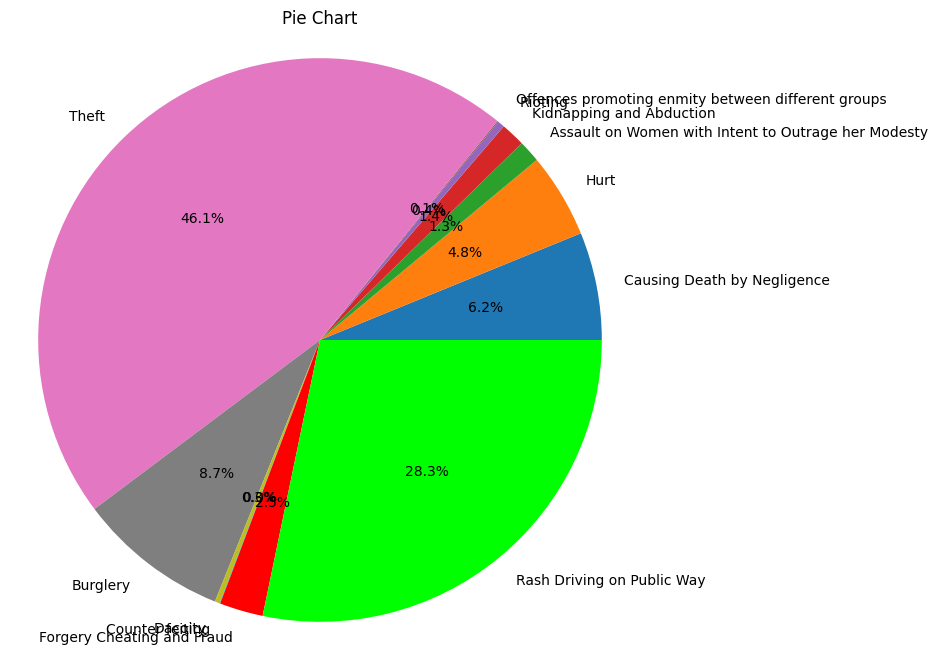

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset from CSV file
data = pd.read_csv("2017.x.csv")

# Assuming your dataset has a column named 'categories' containing the categories for the pie chart
categories = data['Crimes']

# Assuming your dataset has a column named 'values' containing the corresponding values for each category
values = data['Sum']

# Define 12 colors for the pie chart
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b',
          '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#ff0000', '#00ff00']

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(values, labels=categories, autopct='%1.1f%%', colors=colors)
plt.title('Pie Chart')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

6 years colab file - spatial analysis heat map
pie chart visualization for crime

# **BOX PLOT**

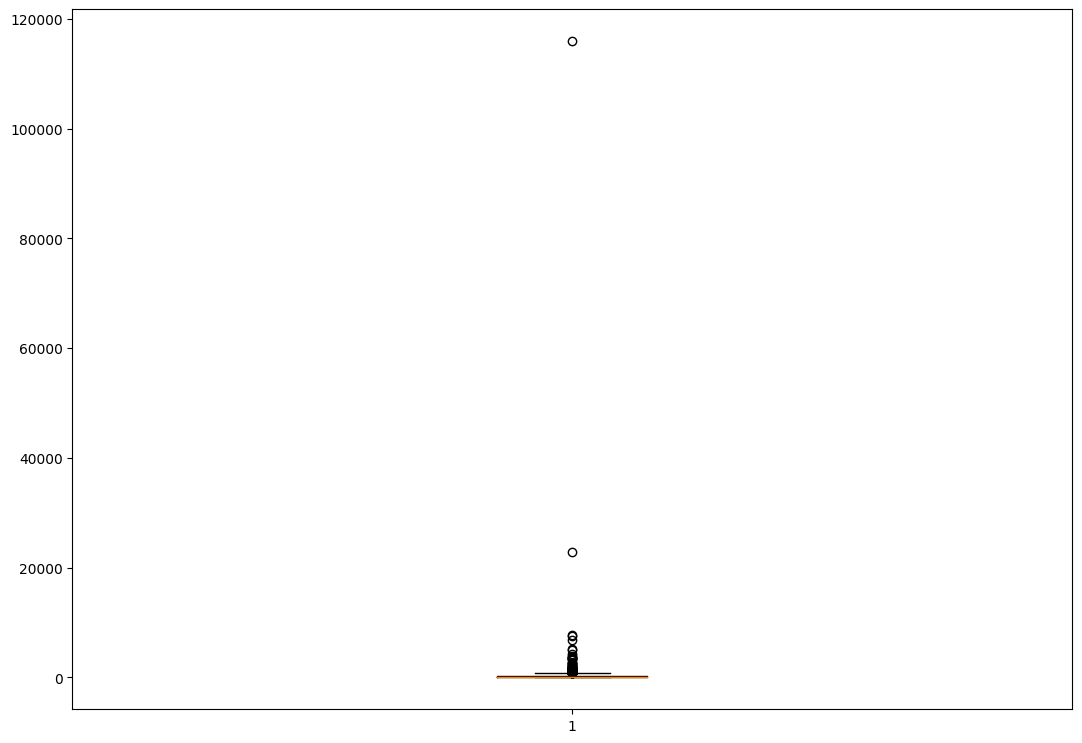

In [ ]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np


# Creating dataset
np.random.seed(10)

data_1 = pd.read_csv('2017.xl.csv')
data = data_1['Theft']

fig = plt.figure(figsize =(10, 7))

# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])

# Creating plot
bp = ax.boxplot(data)

# show plot
plt.show()

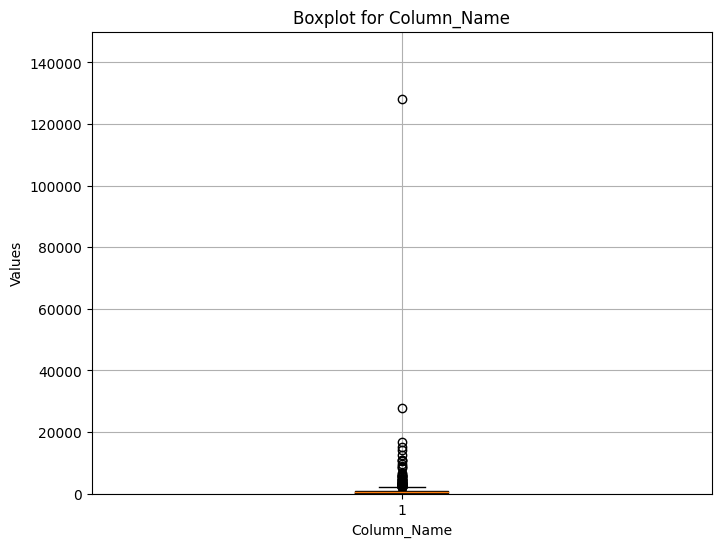

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset from CSV file into a Pandas DataFrame
data = pd.read_csv("2017.xl.csv")

# Select the column of interest (replace 'Column_Name' with the actual column name)

# Plot the boxplot
plt.figure(figsize=(8, 6))  # Set the figure size
plt.boxplot(data['Target'])
plt.title('Boxplot for Column_Name')  # Set the title
plt.xlabel('Column_Name')  # Set the x-axis label
plt.ylabel('Values')  # Set the y-axis label
plt.ylim(0, 150000)
plt.grid(True)  # Show grid
plt.show()

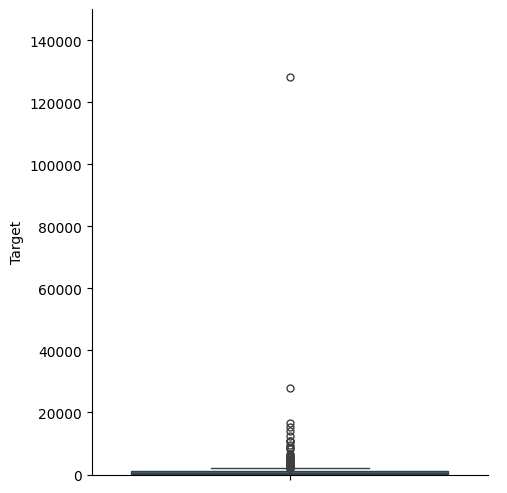

In [ ]:
import pandas as pd
import seaborn as sns

# Load the dataset from CSV file into a Pandas DataFrame
data = pd.read_csv("2017.xl.csv")

# Select the column of interest (replace 'Column_Name' with the actual column name)
column_data = data['Theft']
# Create a categorical plot (boxplot) using seaborn
sns.catplot(y= 'Target', kind='box', data=data)
plt.ylim(0, 150000)
# Show the plot
plt.show()

In [ ]:
import plotly.express as px
import pandas as pd
df = pd.read_csv('2017.xl.csv')
fig = px.box(df, y="Target")
fig.show()

In [ ]:
import plotly.express as px
import pandas as pd
df = pd.read_csv('2022.xl.csv')
fig = px.box(df, y="Theft", points="all")
fig.show()

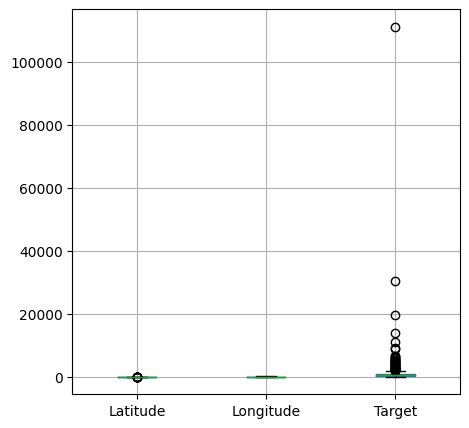

In [ ]:
import pandas as pd

#add csv file to dataframe
df = pd.read_csv('2022.xl.csv')
#create boxplot
boxplot = df.boxplot(figsize = (5,5))

In [ ]:
import numpy as np
import pandas as pd

data = pd.read_csv('2017.xl.csv')

mean = np.round(np.mean(data['Target']), 0)
median = np.round(np.median(data['Target']), 0)
min_value = np.round(data['Target'].min(), 0)
max_value = np.round(data['Target'].max(), 0)
quartile_1 = np.round(data['Target'].quantile(0.25), 0)
quartile_3 = np.round(data['Target'].quantile(0.75), 0)
# Interquartile range
iqr = np.round(quartile_3 - quartile_1, 0)

print('Min: %s' % min_value)
print('Mean: %s' % mean)
print('Max: %s' % max_value)
print('25th percentile: %s' % quartile_1)
print('Median: %s' % median)
print('75th percentile: %s' % quartile_3)
print('Interquartile range (IQR): %s' % iqr)

Min: 2.0
Mean: 1190.0
Max: 128264.0
25th percentile: 239.0
Median: nan
75th percentile: 982.0
Interquartile range (IQR): 743.0


# **FORECASTING**

In [ ]:
pip install matplotlib

In [ ]:
!pip install pmdarima


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.0 MB/s eta 0:00:00


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=7.23 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=68663.490, Time=0.12 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=68664.664, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=68664.679, Time=0.16 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=2.06 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=68622.114, Time=0.12 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=68624.080, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=68624.083, Time=0.29 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=68626.082, Time=1.03 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 11.268 seconds


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


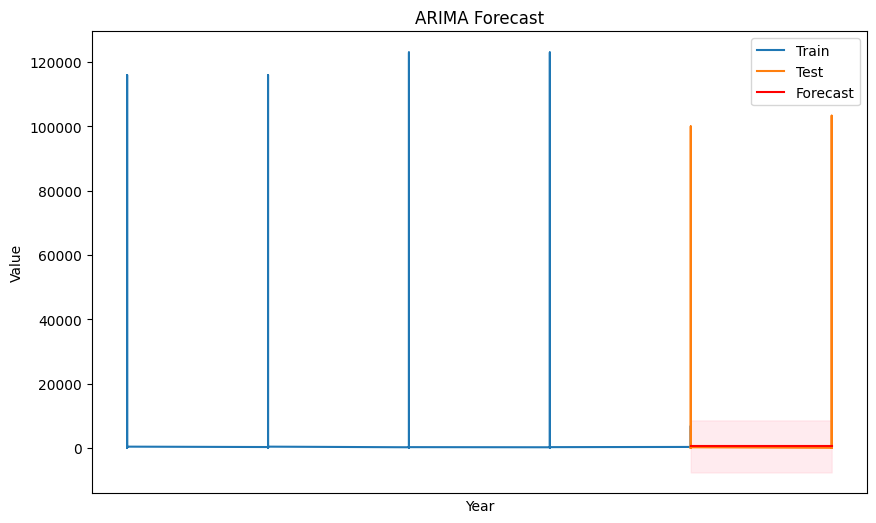

In [ ]:
import pandas as pd
import numpy as np
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Load CSV data
data = pd.read_csv('Forecast_Data1.csv')

# Assuming your CSV has a column named 'date' and another named 'value'
# You may need to adjust this depending on your CSV structure
data['Year'] = pd.to_datetime(data['Year'])
data.set_index('Year', inplace=True)

# Split data into train and test sets
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

# Fit ARIMA model
model = auto_arima(train, seasonal=False, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)

# Forecast
forecast, conf_int = model.predict(n_periods=len(test), return_conf_int=True)
forecast_index = test.index

# Plot actual vs. forecasted values
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(forecast_index, forecast, label='Forecast', color='red')
plt.fill_between(forecast_index, conf_int[:, 0], conf_int[:, 1], color='pink', alpha=0.3)
plt.title('ARIMA Forecast')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.show()

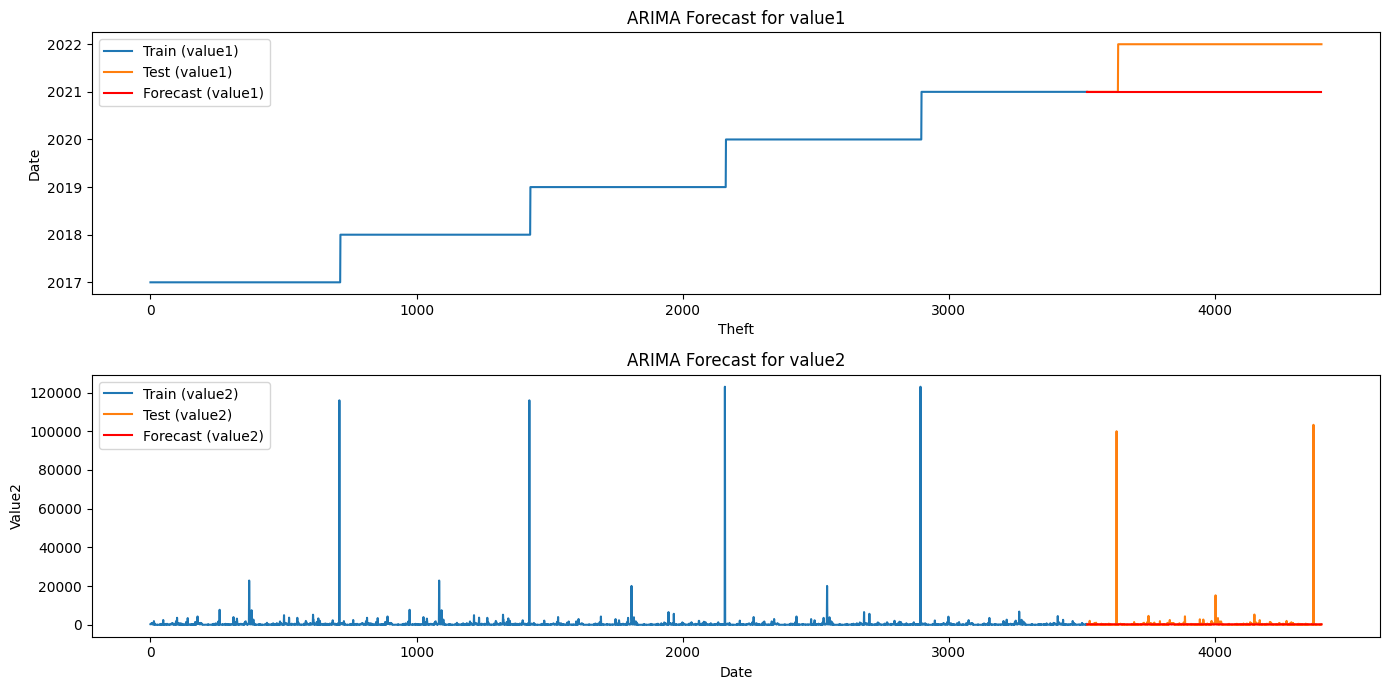

In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('Forecast_Data1.csv')

# Split the data into train and test sets for each variable
train_size = int(len(data) * 0.8)
train1, test1 = data['Year'][:train_size], data['Year'][train_size:]
train2, test2 = data['Theft'][:train_size], data['Theft'][train_size:]

# Fit ARIMA models for each variable
model1 = ARIMA(train1, order=(5,1,0))
model_fit1 = model1.fit()
model2 = ARIMA(train2, order=(5,1,0))
model_fit2 = model2.fit()

# Forecast for each variable
forecast1 = model_fit1.forecast(steps=len(test1))
forecast2 = model_fit2.forecast(steps=len(test2))

# Plot actual vs. forecasted values for each variable
plt.figure(figsize=(14, 7))

plt.subplot(2, 1, 1)
plt.plot(train1.index, train1, label='Train (value1)')
plt.plot(test1.index, test1, label='Test (value1)')
plt.plot(test1.index, forecast1, label='Forecast (value1)', color='red')
plt.title('ARIMA Forecast for value1')
plt.xlabel('Theft')
plt.ylabel('Date')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(train2.index, train2, label='Train (value2)')
plt.plot(test2.index, test2, label='Test (value2)')
plt.plot(test2.index, forecast2, label='Forecast (value2)', color='red')
plt.title('ARIMA Forecast for value2')
plt.ylabel('Value2')
plt.legend()

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

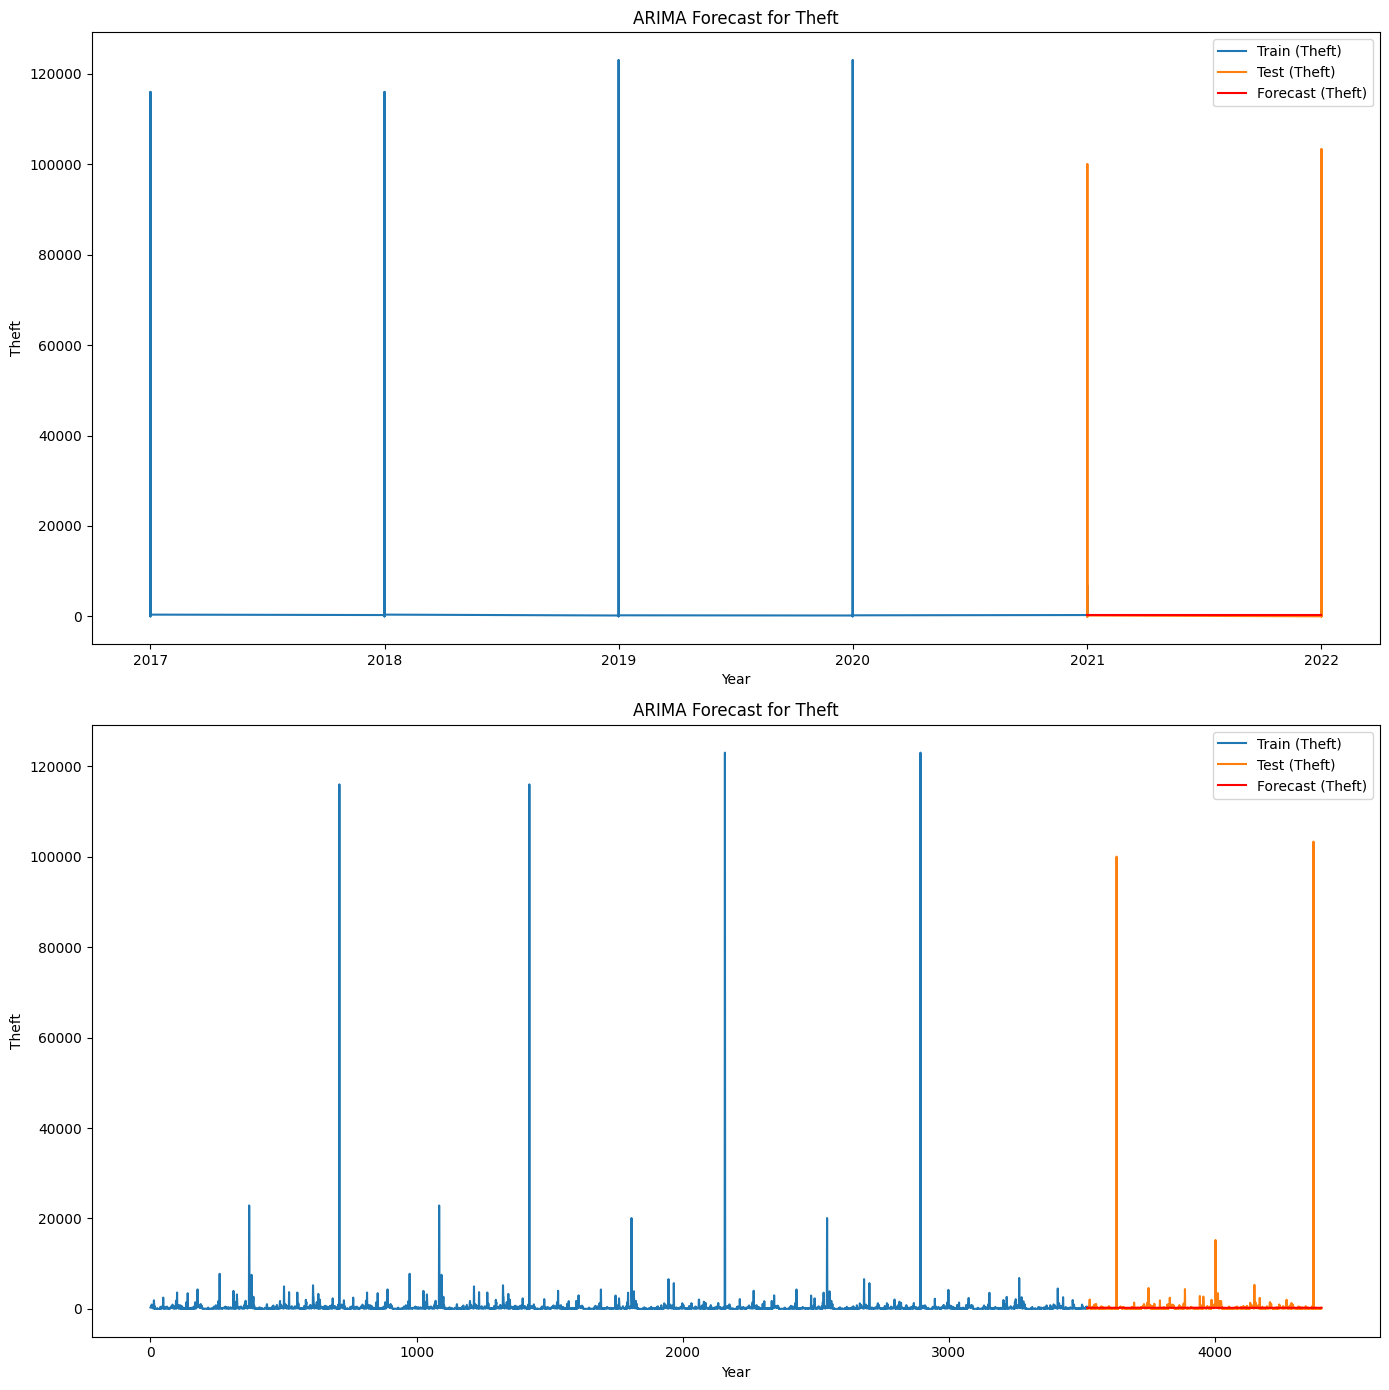

In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('Forecast_Data1.csv')

# Assuming your CSV has columns named 'Year', 'Theft', and 'Robbery'
# Adjust this depending on your CSV structure
data['Year'] = pd.to_datetime(data['Year'], format='%Y')
data.set_index('Year', inplace=True)

# Split the data into train and test sets for each variable
train_size = int(len(data) * 0.8)
train1, test1 = data['Theft'][:train_size], data['Theft'][train_size:]

# Fit ARIMA models for each variable
model1 = ARIMA(train1, order=(5,1,0))
model_fit1 = model1.fit()
model2 = ARIMA(train2, order=(5,1,0))
model_fit2 = model2.fit()

# Forecast for each variable
forecast1 = model_fit1.forecast(steps=len(test1))
forecast2 = model_fit2.forecast(steps=len(test2))

# Plot actual vs. forecasted values for each variable
plt.figure(figsize=(14, 14))

plt.subplot(2, 1, 1)
plt.plot(train1.index, train1, label='Train (Theft)')
plt.plot(test1.index, test1, label='Test (Theft)')
plt.plot(test1.index, forecast1, label='Forecast (Theft)', color='red')
plt.title('ARIMA Forecast for Theft')
plt.xlabel('Year')
plt.ylabel('Theft')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(train2.index, train2, label='Train (Theft)')
plt.plot(test2.index, test2, label='Test (Theft)')
plt.plot(test2.index, forecast2, label='Forecast (Theft)', color='red')
plt.title('ARIMA Forecast for Theft')
plt.xlabel('Year')
plt.ylabel('Theft')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

# Load your dataset
data = pd.read_csv('Forecast_Data1.csv')

# Assume the dataset has columns 'date', 'column1', and 'column2'
data['date'] = pd.to_datetime(data['Year'])
data.set_index('date', inplace=True)

Year     0
Theft    0
dtype: int64


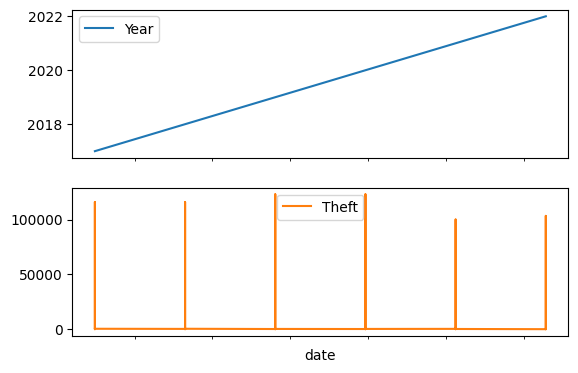

In [ ]:
# Check for missing values
print(data.isnull().sum())

# Fill missing values if any
data.fillna(method='ffill', inplace=True)

# Visualize the data (optional)
import matplotlib.pyplot as plt

data.plot(subplots=True)
plt.show()

In [ ]:
train_size = int(len(data) * 0.8)
train, test = data.iloc[:train_size], data.iloc[train_size:]

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Define a function to fit an ARIMA model
def fit_arima_model(train, order):
    model = ARIMA(train, order=order)
    model_fit = model.fit()
    return model_fit

# Example ARIMA order (p,d,q)
order = (1, 1, 1)

# Fit ARIMA models for both columns
model1 = fit_arima_model(train['Year'], order)
model2 = fit_arima_model(train['Theft'], order)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
<ipython-input-18-0de548b71f1f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['forecast1'] = forecast1
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results w

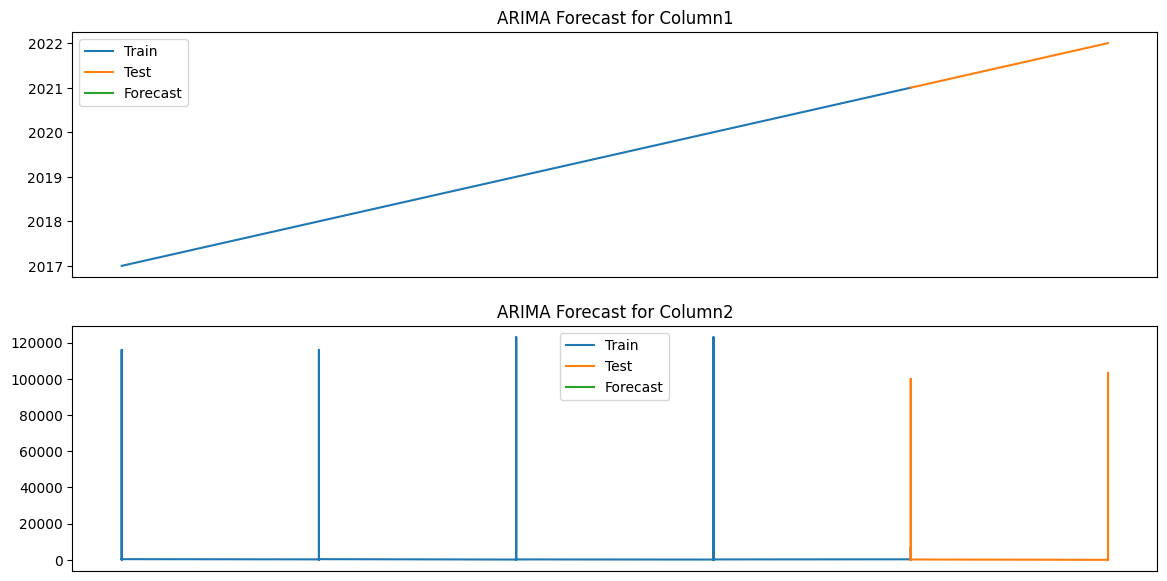

In [ ]:
# Forecast for 'column1'
forecast1 = model1.forecast(steps=len(test))
test['forecast1'] = forecast1

# Forecast for 'column2'
forecast2 = model2.forecast(steps=len(test))
test['forecast2'] = forecast2

# Plot the forecasts against actual values
plt.figure(figsize=(14, 7))

# Plot for column1
plt.subplot(2, 1, 1)
plt.plot(train['Year'], label='Train')
plt.plot(test['Year'], label='Test')
plt.plot(test['forecast1'], label='Forecast')
plt.title('ARIMA Forecast for Column1')
plt.legend()

# Plot for column2
plt.subplot(2, 1, 2)
plt.plot(train['Theft'], label='Train')
plt.plot(test['Theft'], label='Test')
plt.plot(test['forecast2'], label='Forecast')
plt.title('ARIMA Forecast for Column2')
plt.legend()

plt.show()